# Question 1

In [29]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN, KMeans
from sklearn import metrics
import seaborn as sns

In [30]:
# read the data
df1 = pd.read_csv("./HW3_1_data.csv")

In [31]:
# show the head rows of the data
df1.head()

,x1,x2
0,15.55,28.65
1,14.90,27.55
2,14.45,28.35
3,14.15,28.80
4,13.75,28.05


In [32]:
# drop the rows that have null values
df1.dropna(inplace=True)

In [33]:
# to fetch the x and y data
X1 = df1.iloc[:, 0].values.reshape(-1, 1)
y1 = df1.iloc[:, -1].values.reshape(-1, 1)

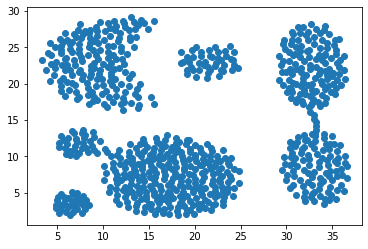

In [34]:
# plot the scatter picture, and to see how many clusters can be
plt.scatter(X1, y1)
# 7 clusters

In [35]:
# calculate the eps and min_samples in the DBSCAN parameters list

# rs = []
# eps = np.arange(0.1, 4, 0.1)
# min_samples = np.arange(2, 20, 1)
#
# best_score = 0
# best_score_eps = 0
# best_score_min_samples = 0
#
# for i in eps:
#     for j in min_samples:
#         try:
#             db = DBSCAN(eps=i, min_samples=j, n_jobs=-1).fit(df1)
#             labels = db.labels_
#             k = metrics.silhouette_score(df1, labels) # to get the current silhouette_score
#             ratio = len(labels[labels[:] == -1]) / len(labels)  # to calculate the ratio of noise and the total point
#             n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)  # obtain the number of clusters
#             rs.append([i, j, k, ratio, n_clusters_])
#
#             if k > best_score:
#                 best_score = k
#                 best_score_eps = i
#                 best_score_min_samples = j
#             else:
#                 db = ''
#         except Exception:
#             db = ''
# rs = pd.DataFrame(rs)
#rs.columns = ['eps', 'min_samples', 'score', 'ratio', 'n_clusters']
# sns.relplot(x="eps", y="min_samples", size='score', data=rs)
# sns.relplot(x="eps", y="min_samples", size='ratio', data=rs)
# print(best_score_eps,best_score_min_samples)
# to get the best parameters of the DBSCAN is 1.3 and 7

In [36]:
# set the DBSCAN parameters according to the above
dbscan1 = DBSCAN(eps=1.3, min_samples=7)

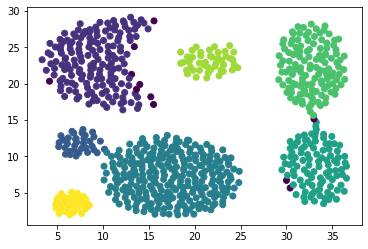

In [37]:
# to plot the results of the classification
y_pred1 = dbscan1.fit_predict(df1)
plt.scatter(X1, y1, c=y_pred1)
plt.show()

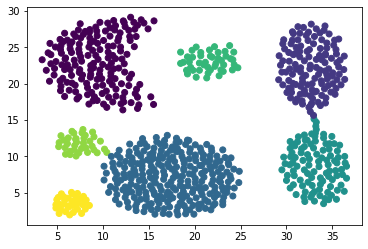

In [38]:
# use SpectralClustering to predict and classification
from sklearn.cluster import SpectralClustering

# n_cluster is 7 as we can see
y_p = SpectralClustering(n_clusters=7).fit_predict(df1)
plt.scatter(X1, y1, c=y_p)
plt.show()

# Question 2

In [39]:
# read the data
df2 = pd.read_csv("./HW3_2_data.csv")

In [40]:
# show the head rows of the data
df2.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [41]:
# describe the data
df2.describe()
# we can see that the data is biased

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


### data processing

In [42]:
# CUST_ID is not useful, drop it
df2.drop(['CUST_ID'], axis=1, inplace=True)

In [43]:
# Because the credit limit has just 1 missing value, so dropping it makes no difference
df2.dropna(subset=['CREDIT_LIMIT'], inplace=True)

In [44]:
# It seems that no columns have relationships with this column so use median value to replace it
df2['MINIMUM_PAYMENTS'].fillna(df2['MINIMUM_PAYMENTS'].median(), inplace=True)

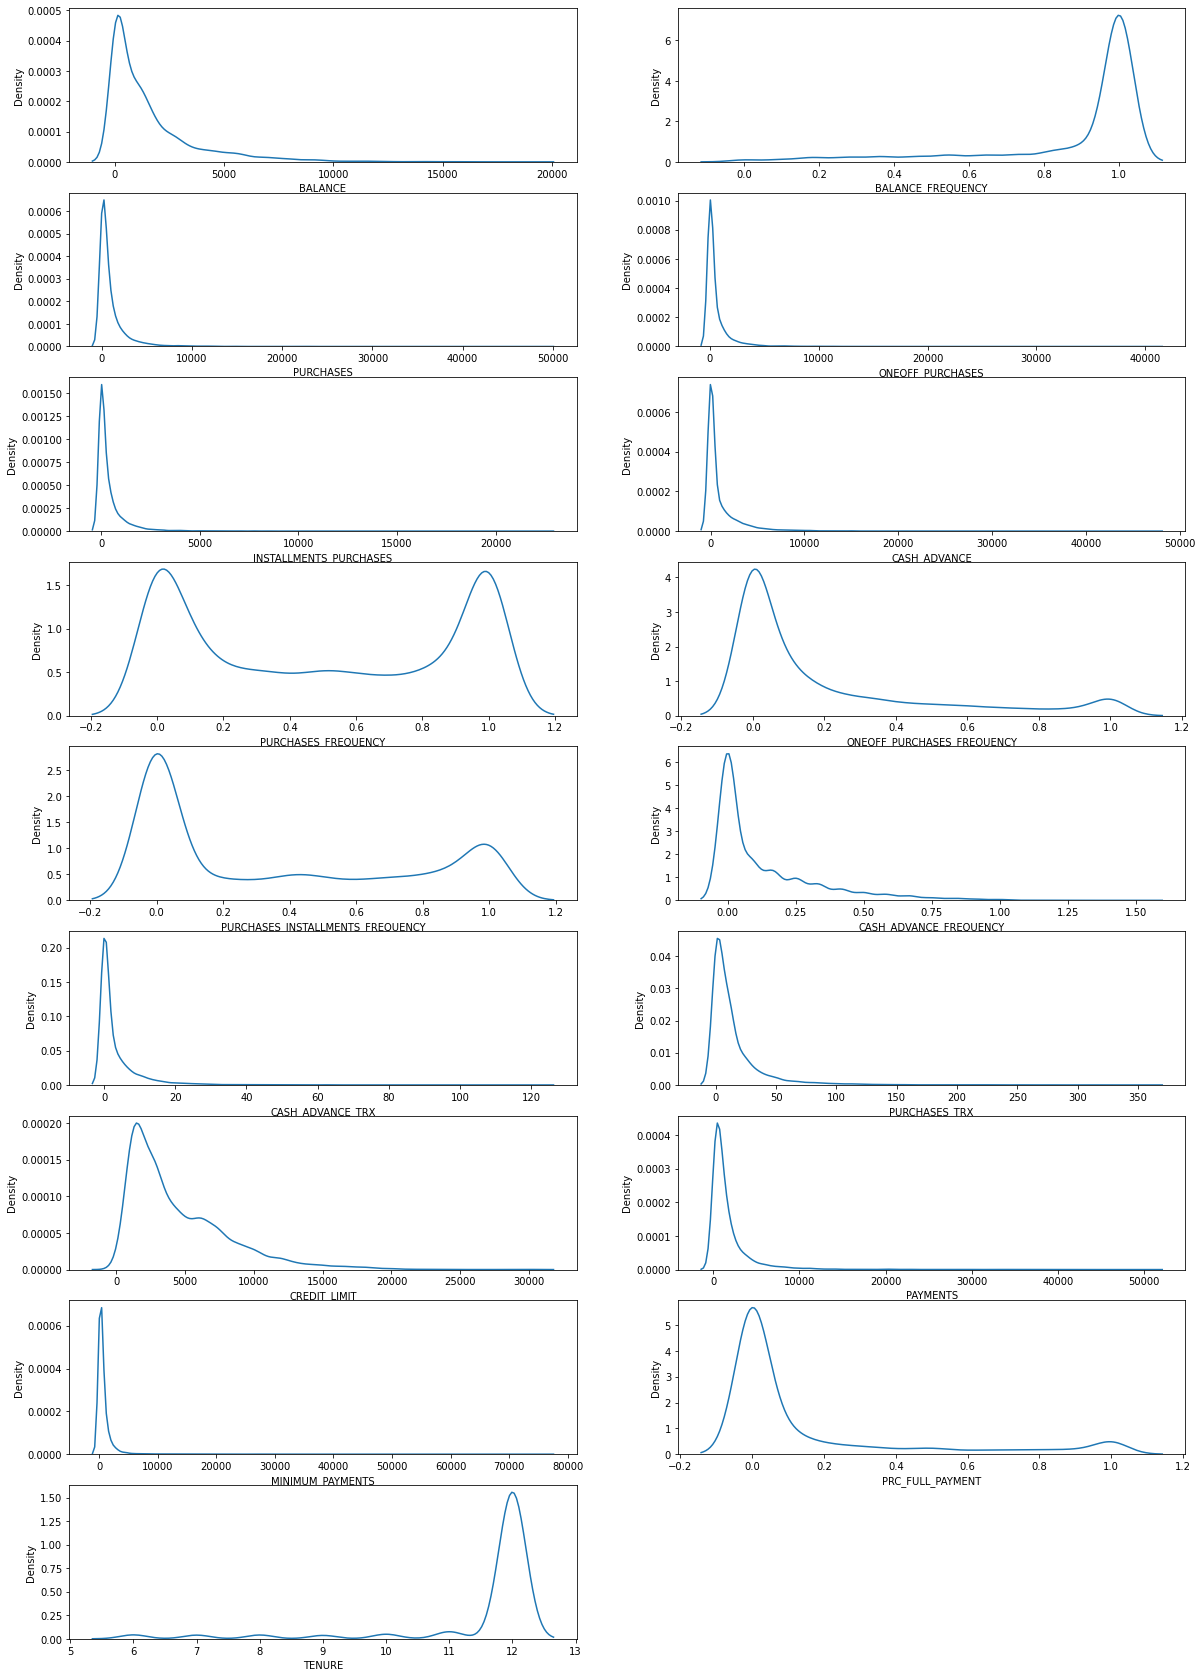

In [45]:
# plot the distribution of each column
plt.figure(figsize=(20, 30))
for i, col in enumerate(df2.columns):
    ax = plt.subplot(9, 2, i + 1)
    sns.kdeplot(df2[col], ax=ax)
    plt.xlabel(col)
plt.show()
# I have found that many of the columns are skewed, so we must handle it

In [46]:
# to take the log value of these columns to evaluate it normally 
cols = ['BALANCE', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'ONEOFF_PURCHASES_FREQUENCY',
        'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
        'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']
# here do not need to add `PURCHASES` since the result is not good
for col in cols:
    df2[col] = np.log(1 + df2[col])

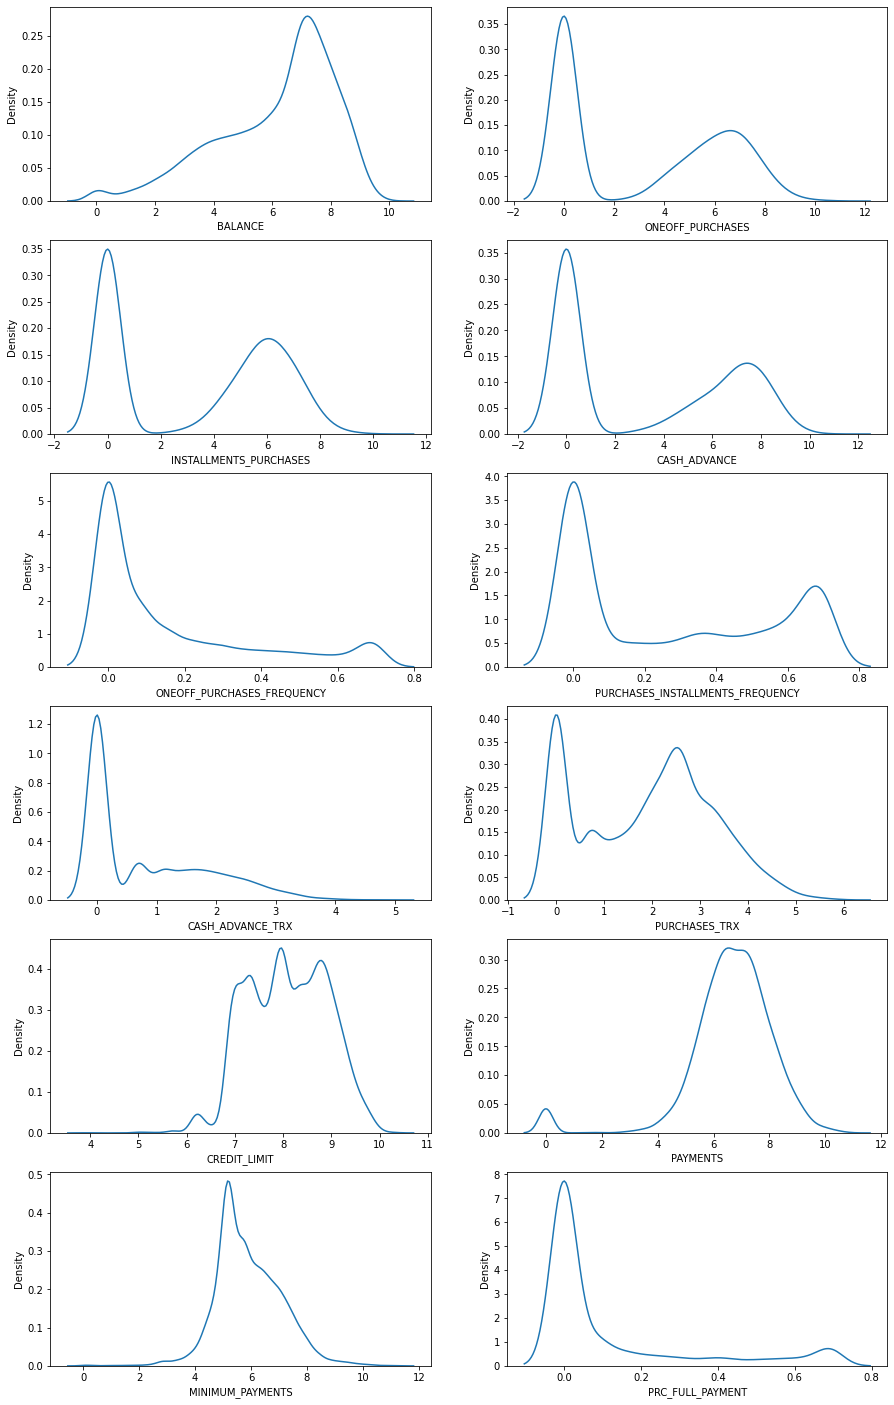

In [47]:
plt.figure(figsize=(15, 25))
for i, col in enumerate(cols):
    ax = plt.subplot(6, 2, i + 1)
    sns.kdeplot(df2[col], ax=ax)
    plt.xlabel(col)
plt.show()

In [48]:
# since the dimension of the data is so large, we need to take the important information of the data
from sklearn.decomposition import PCA

# PCA helps to decrease the dimensions
# using `mle` to fit automatically
pca = PCA(n_components='mle')
X_reduce = pca.fit_transform(df2)

In [49]:
from sklearn.cluster import KMeans

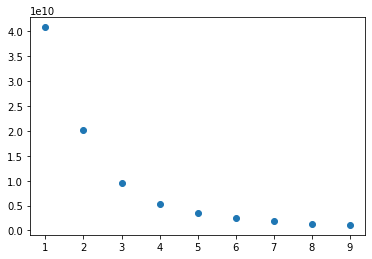

In [50]:
# to find the best k for clustering
km = []
innertia_m = []
for i in range(1, 10):
    km.append(KMeans(n_clusters=i, random_state=0).fit(X_reduce))
    innertia_m.append(km[i - 1].inertia_)
plt.scatter(range(1, 10), innertia_m)

In [51]:
# in the picture we can see that the best possible k is 3
# and we use 3 for clustering
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X_reduce)

KMeans(n_clusters=3, random_state=0)

In [52]:
df2['LABEL'] = kmeans.labels_

In [53]:
# to recover the data
for col in cols:
    df2[col] = np.exp(df2[col])

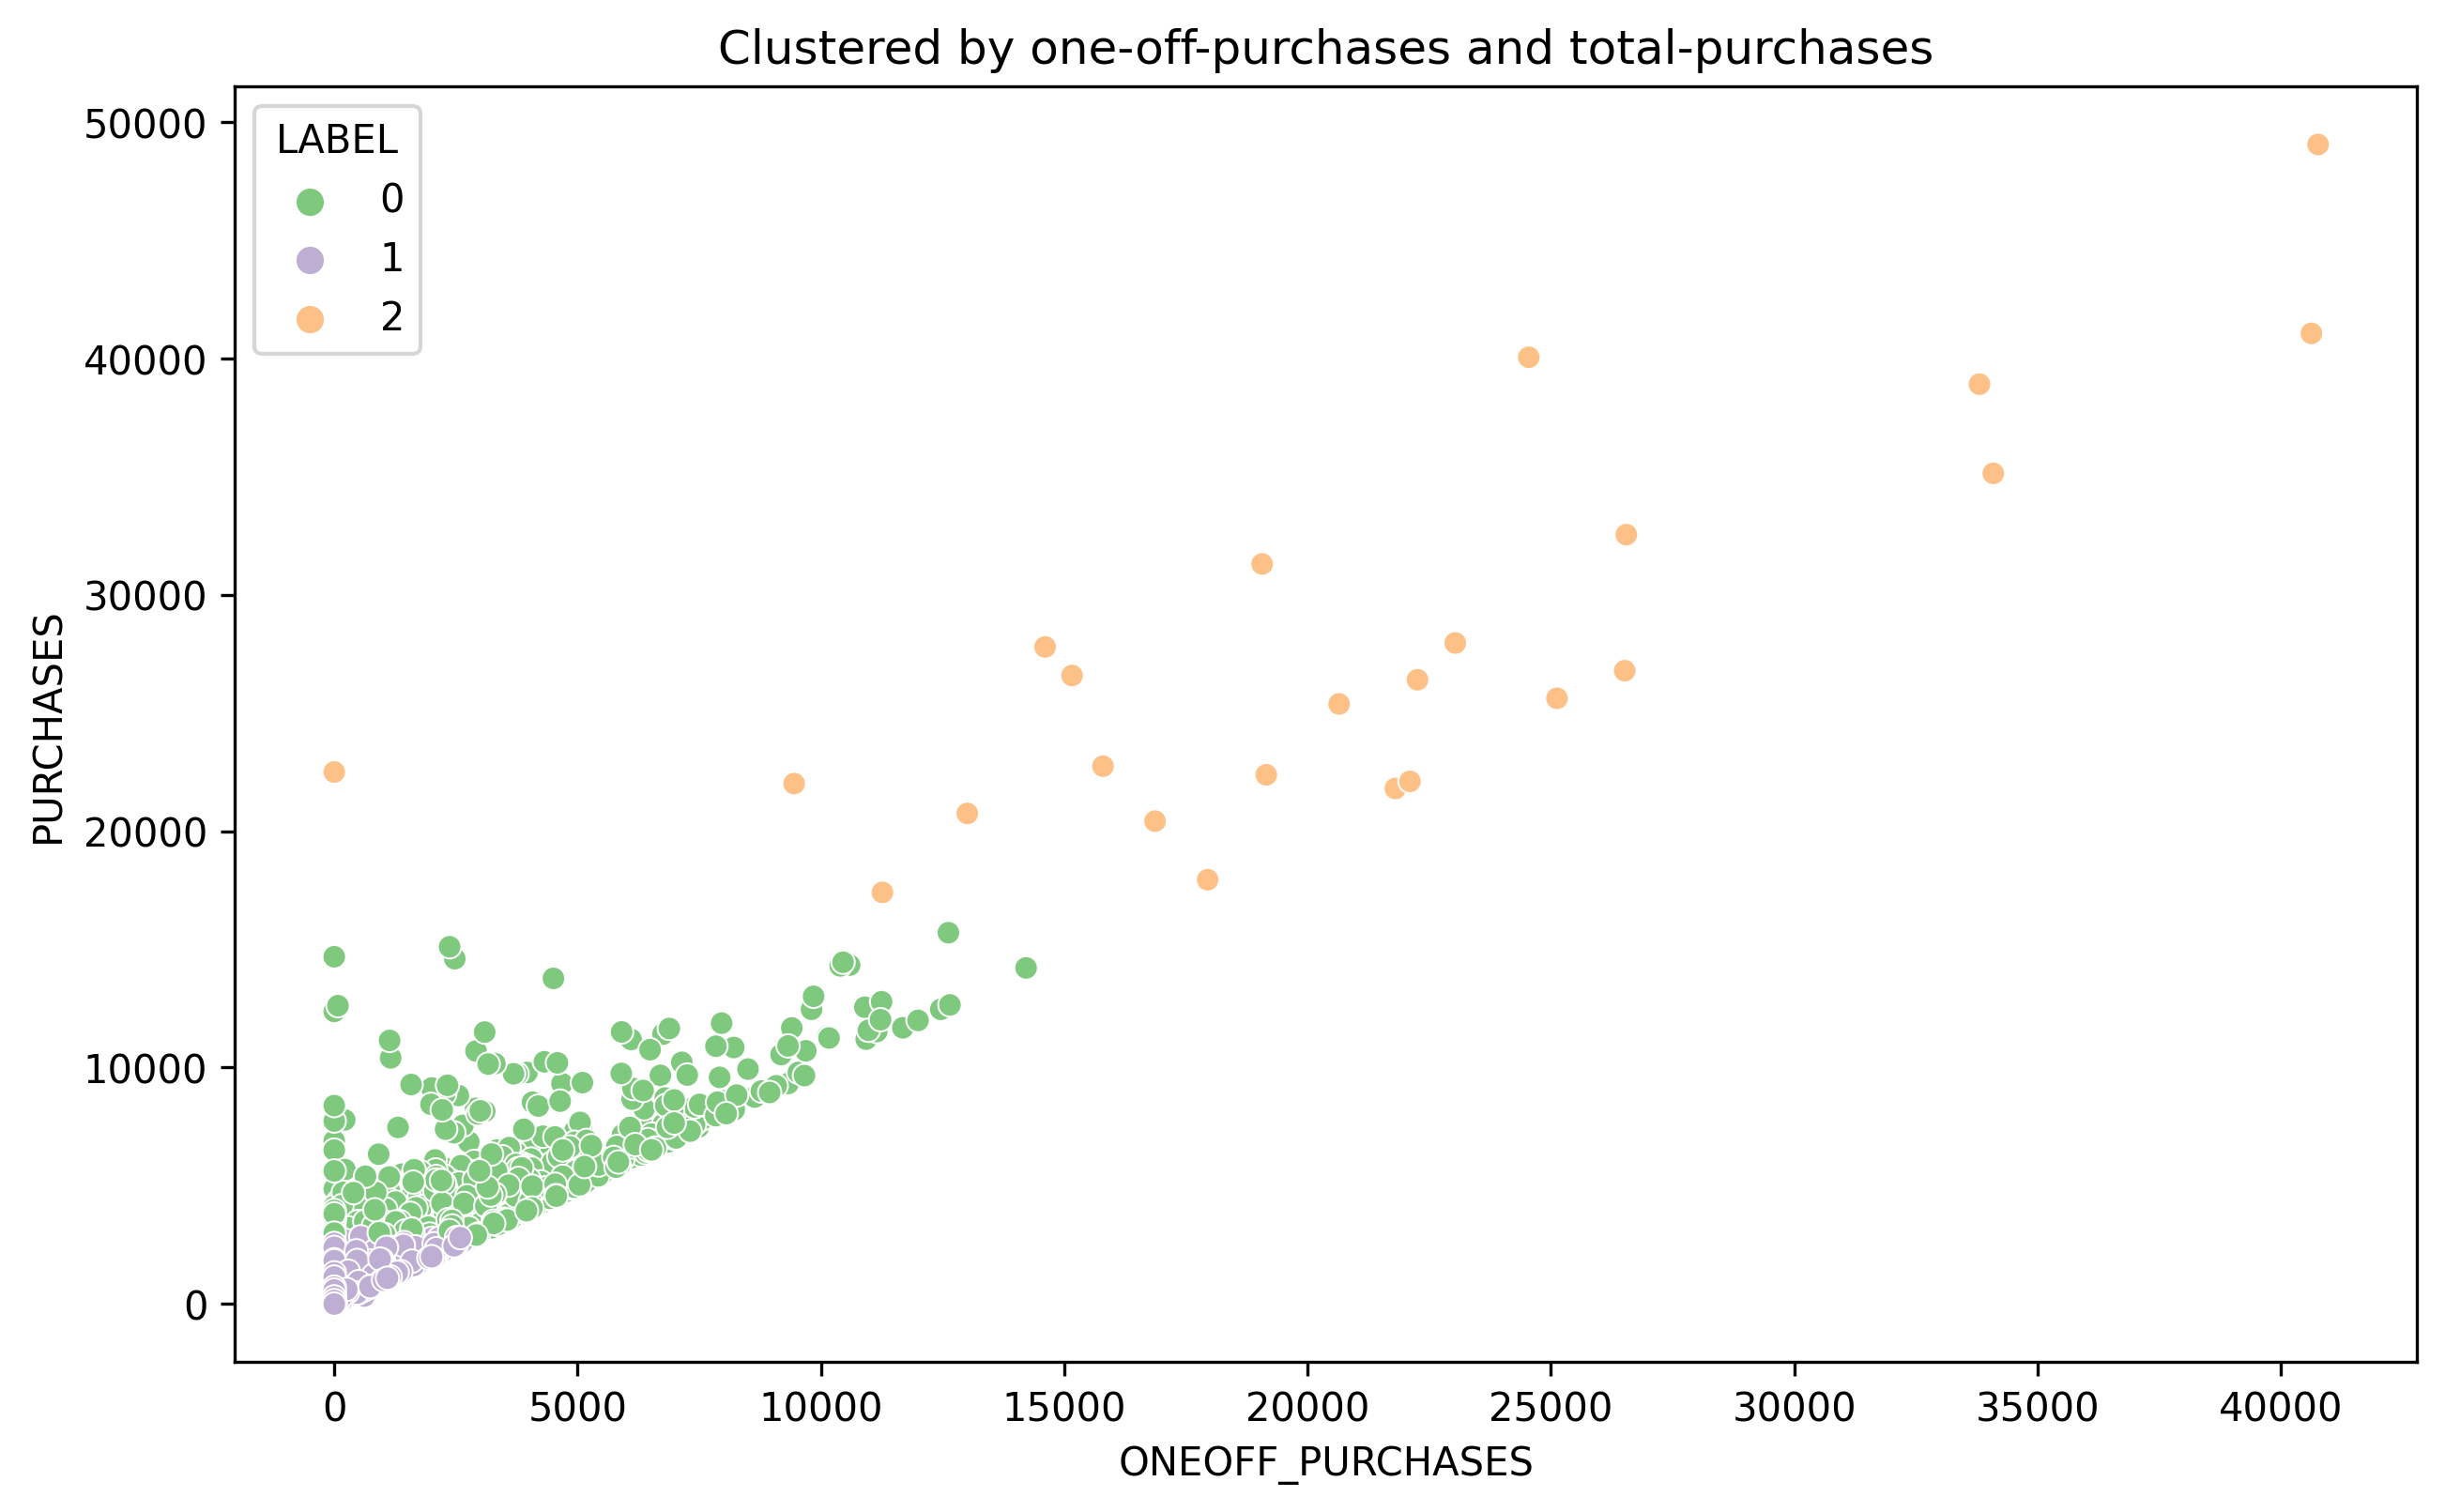

In [54]:
# draw the picture between the `oneoff_puchases` and the `purchases`
plt.figure(figsize=(10, 6), dpi=300)
sns.scatterplot(palette='Accent', data=df2, x='ONEOFF_PURCHASES', y='PURCHASES', hue='LABEL')
plt.title('Clustered by one-off-purchases and total-purchases')
plt.show()

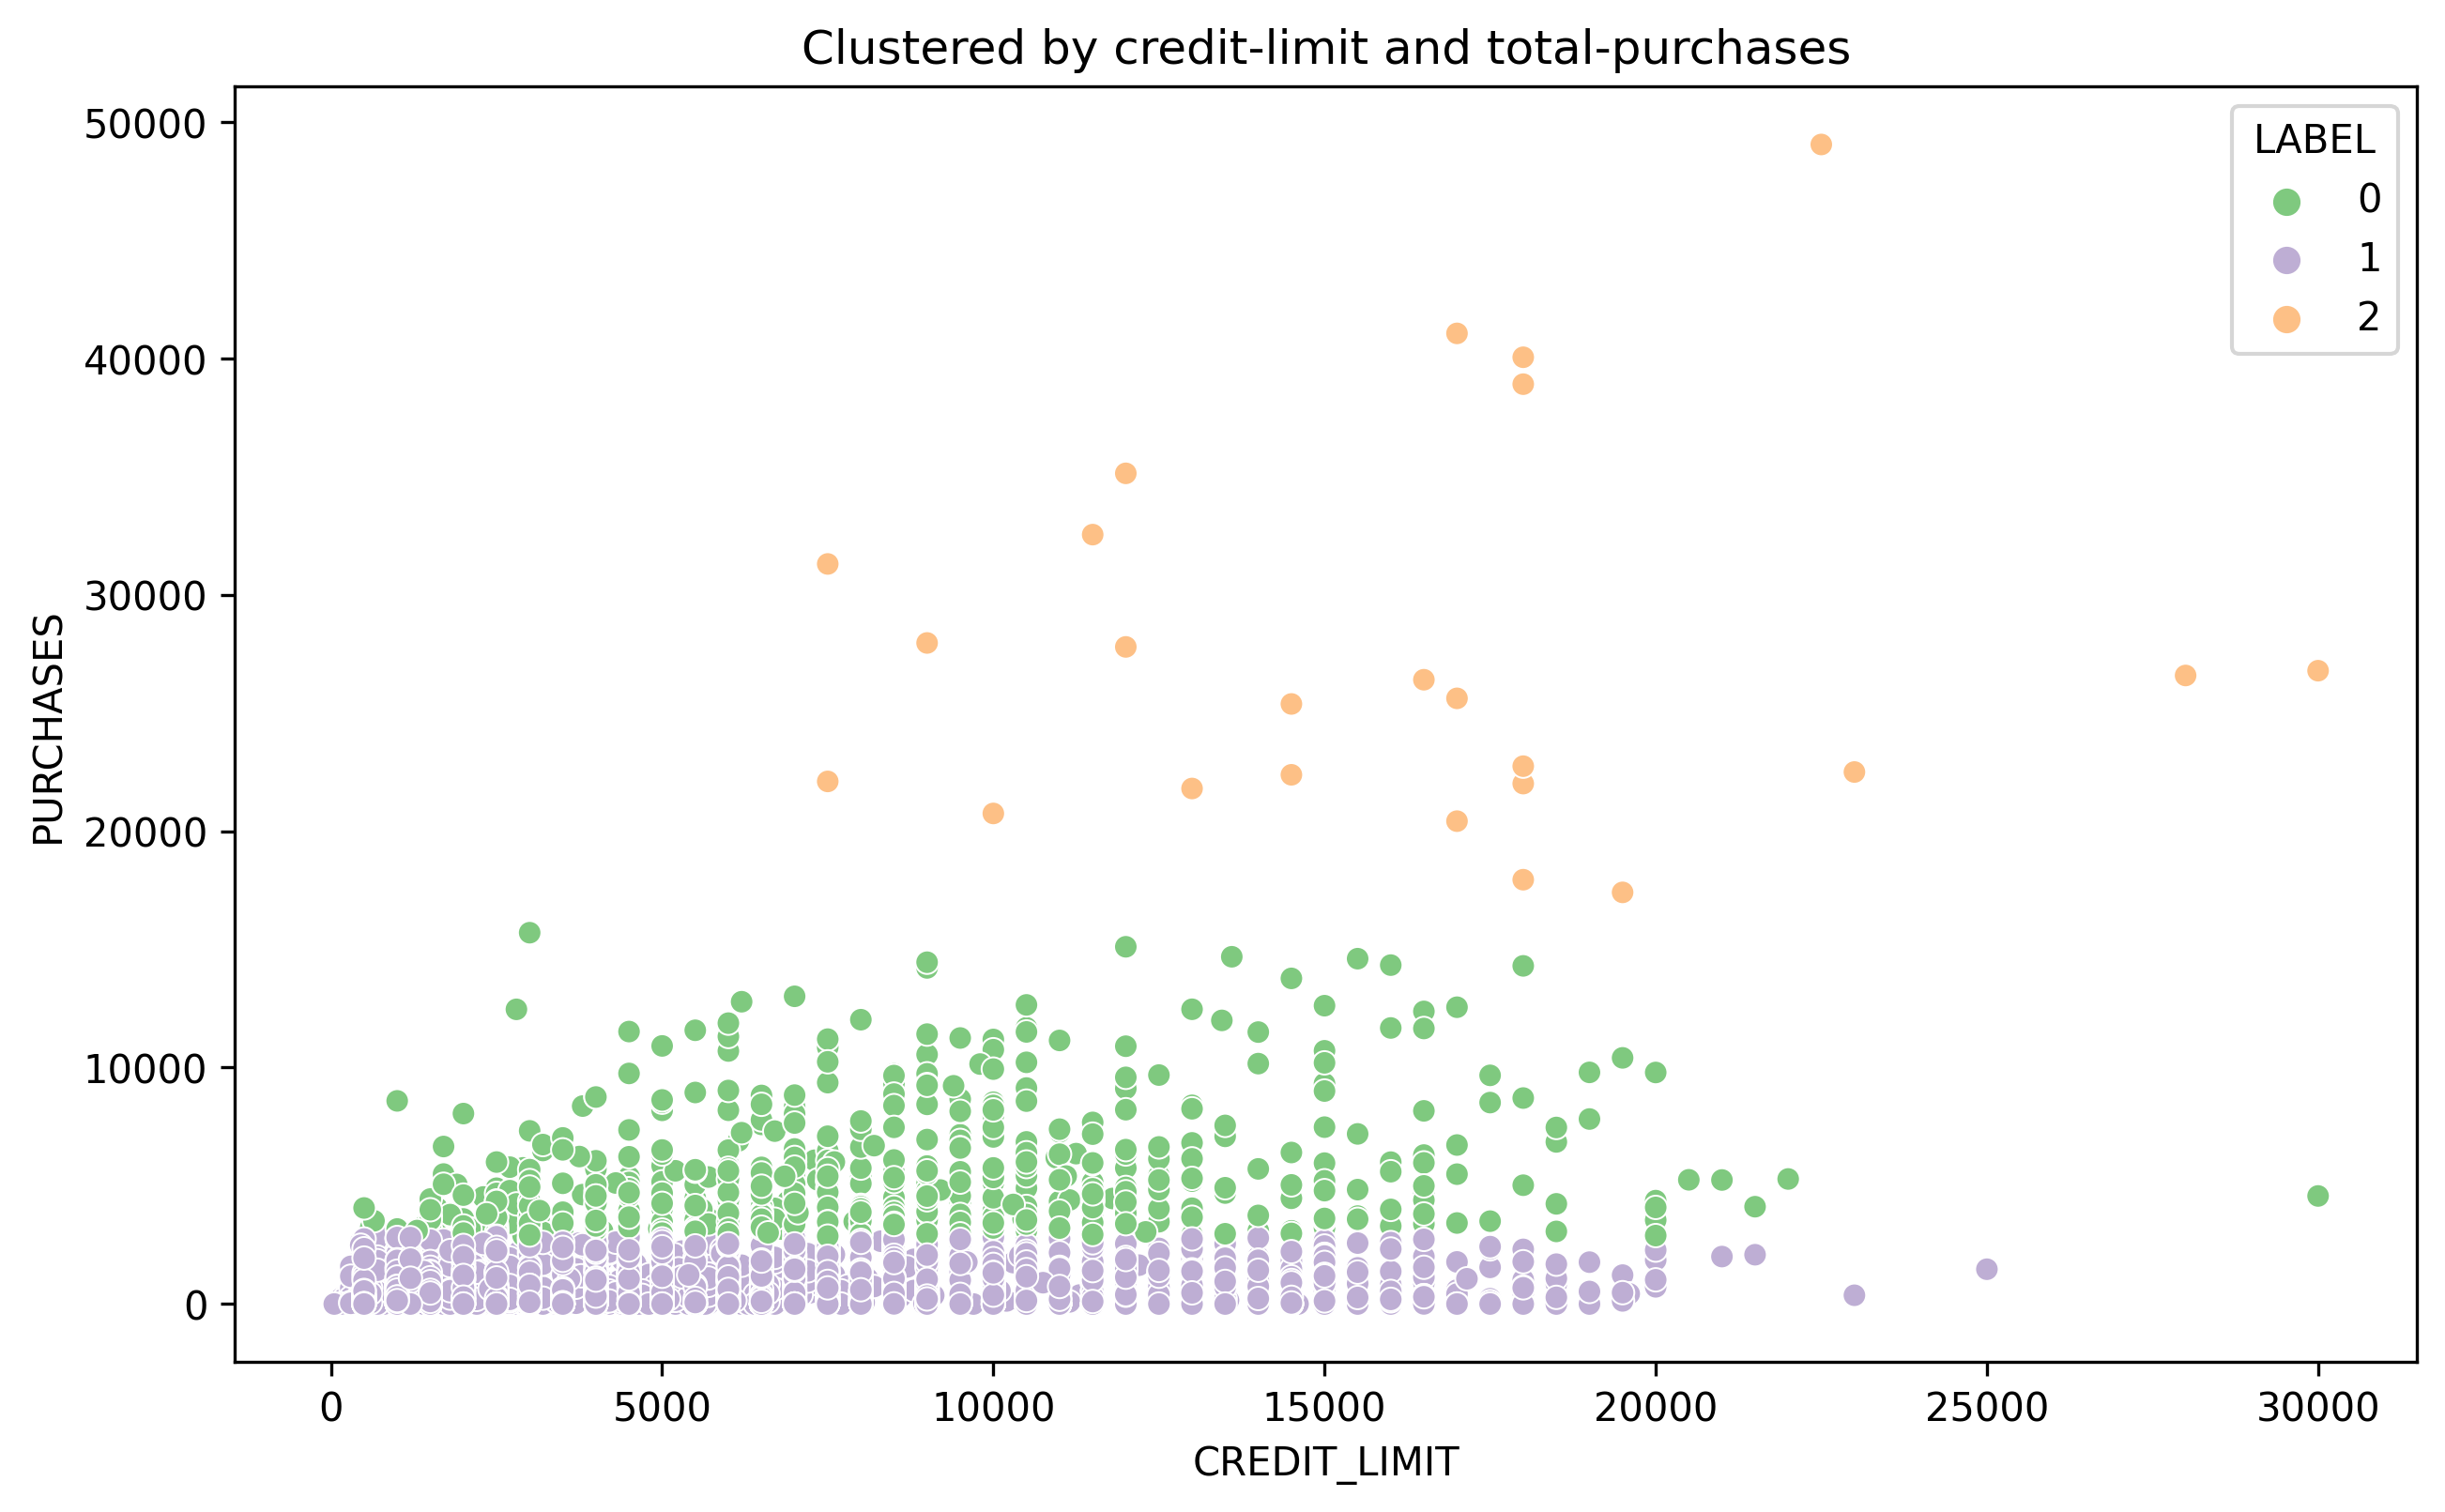

In [55]:
# draw the picture between the `credit_limit` and the `purchases`
plt.figure(figsize=(10, 6), dpi=300)
sns.scatterplot(palette='Accent', data=df2, x='CREDIT_LIMIT', y='PURCHASES', hue='LABEL')
plt.title('Clustered by credit-limit and total-purchases')
plt.show()

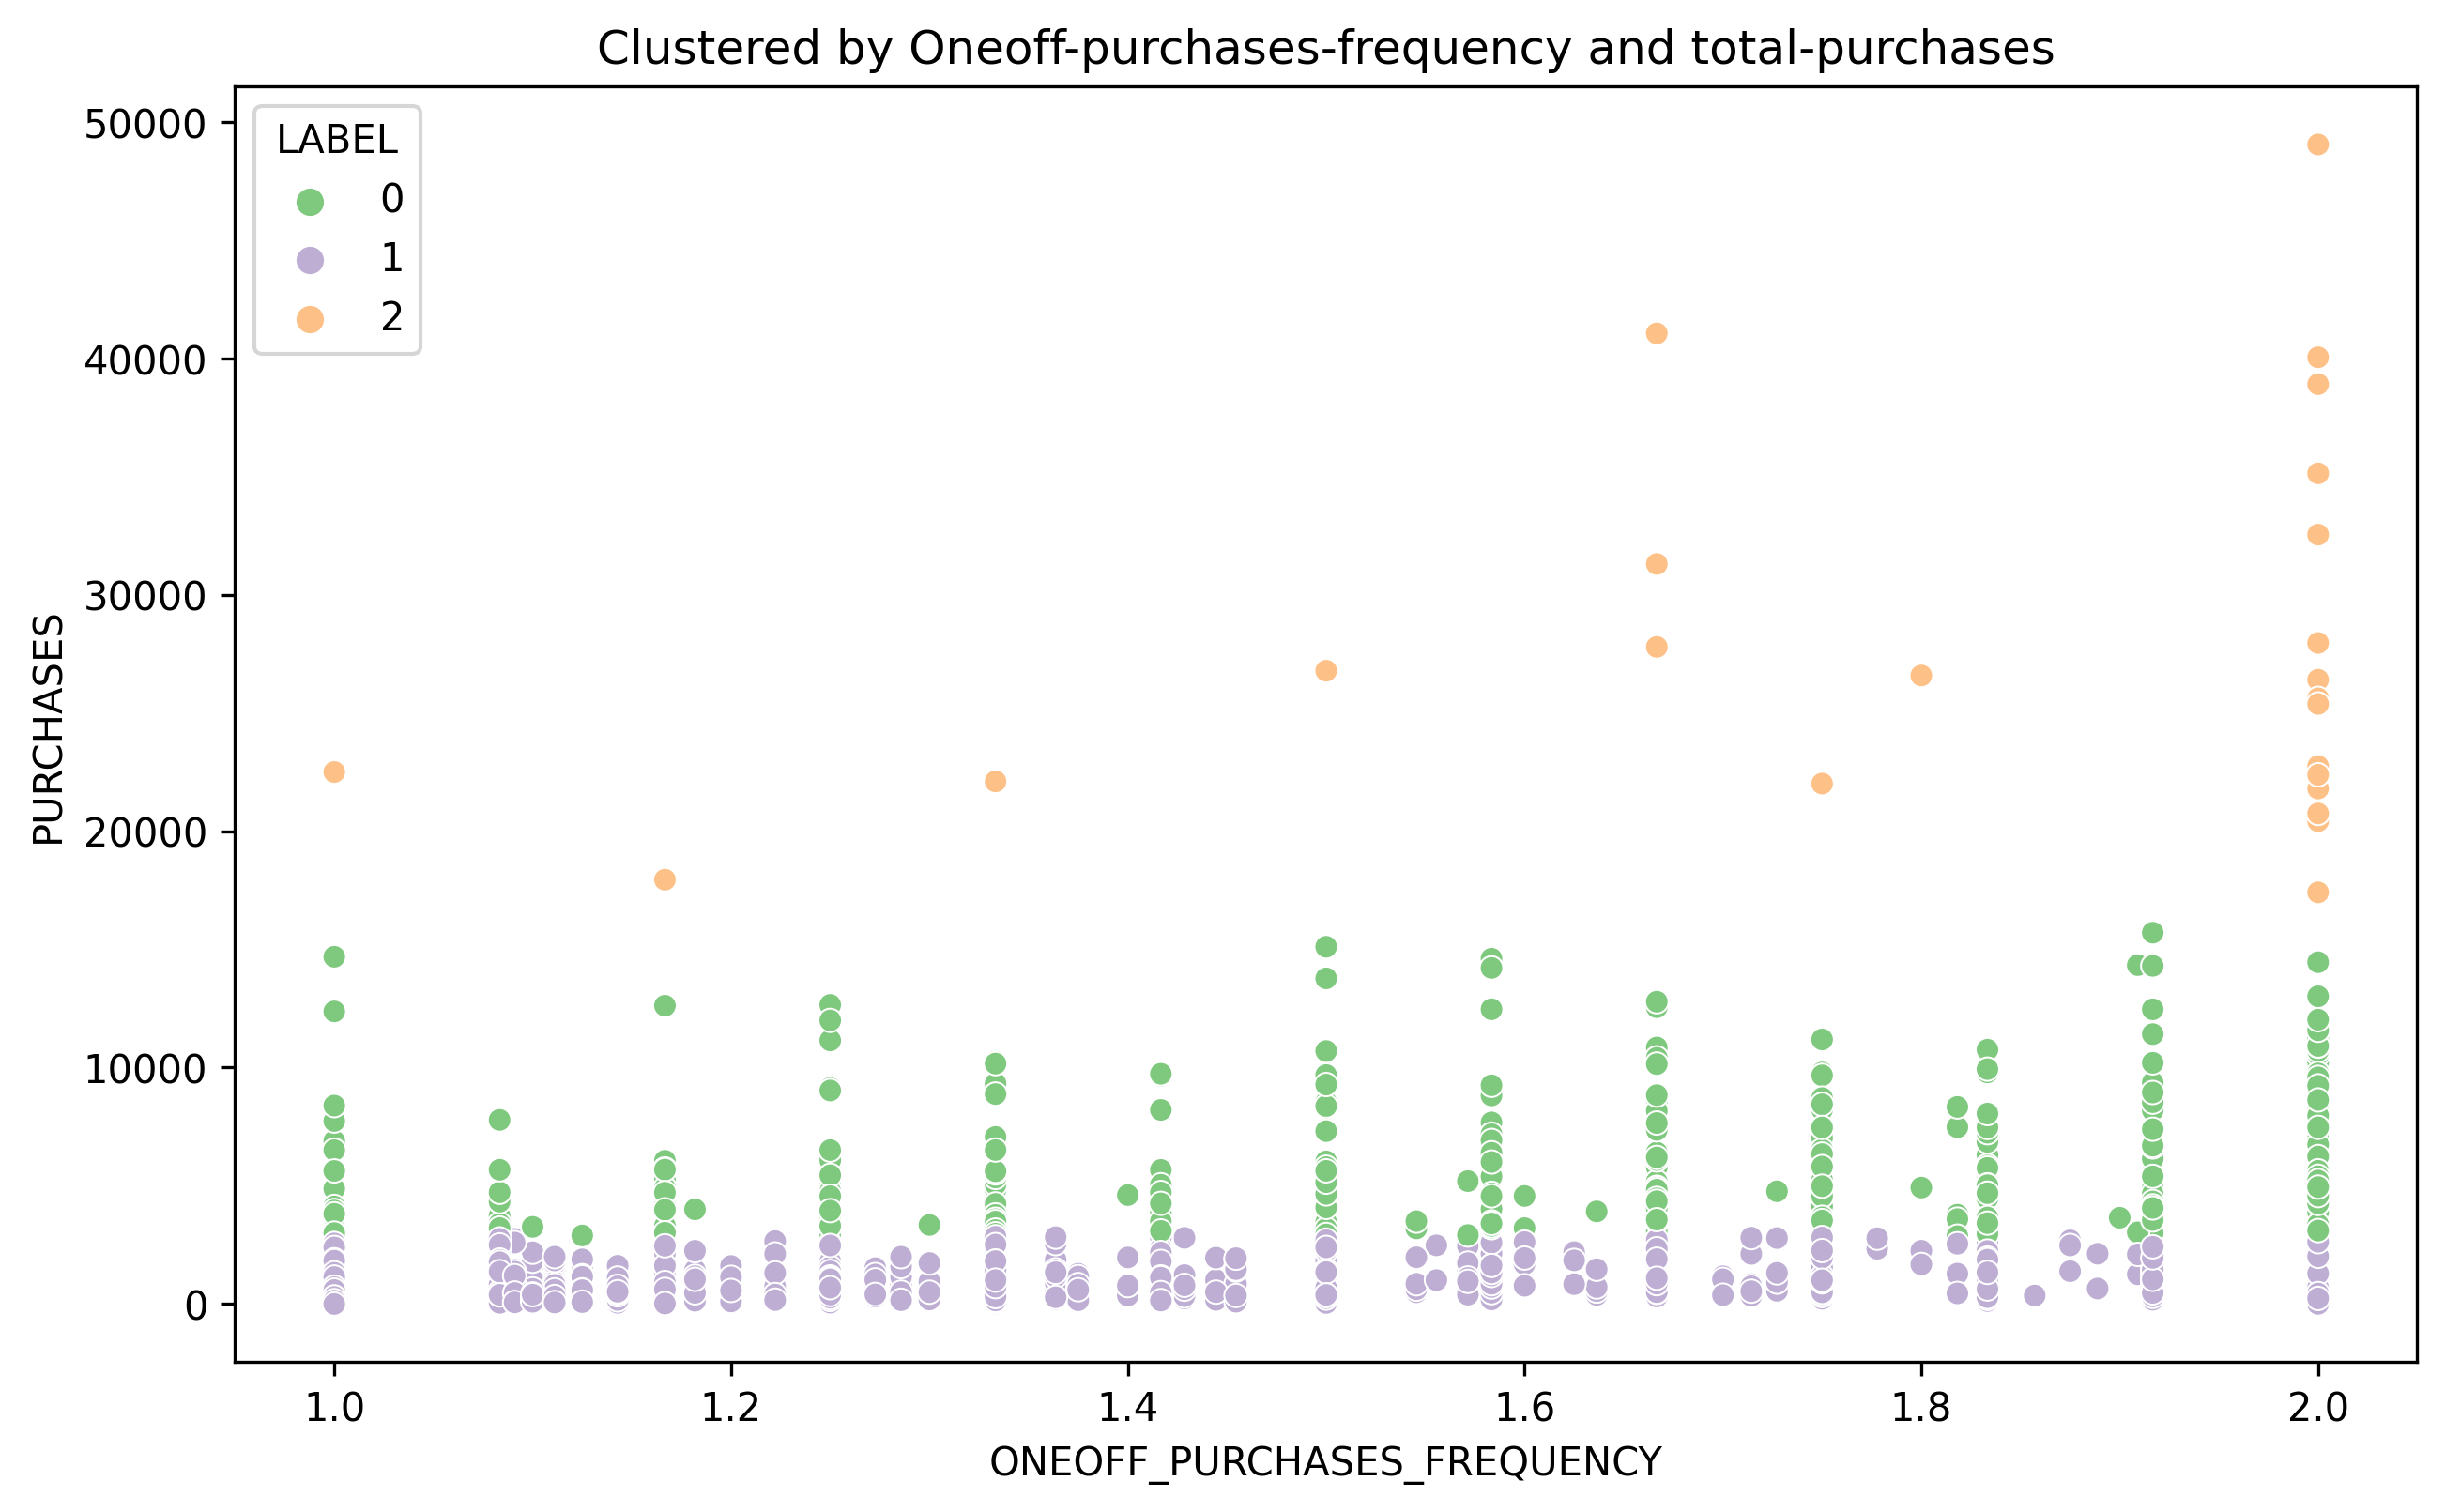

In [56]:
# draw the picture between the `oneoff_purchases_frequency` and the `purchases`
plt.figure(figsize=(10, 6), dpi=300)
sns.scatterplot(palette='Accent', data=df2, x='ONEOFF_PURCHASES_FREQUENCY', y='PURCHASES', hue='LABEL')
plt.title('Clustered by Oneoff-purchases-frequency and total-purchases')
plt.show()

# we can see that the clustering makes sense